<a href="https://colab.research.google.com/github/GustavoNeri02/Algoritmo-Genetico-Fuzzy/blob/main/algoritmo_genetico_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# [1] Instação do pacote skfuzzy
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=48c158f5118da461594ecc0dc9db541fb81189d7a3dfe63b7fcbf55fc3b00ecc
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


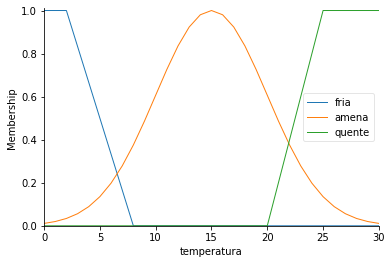

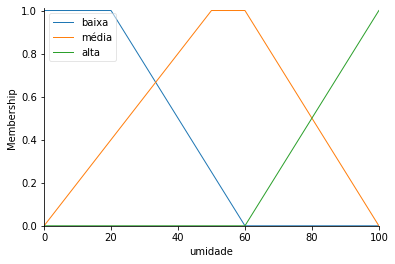

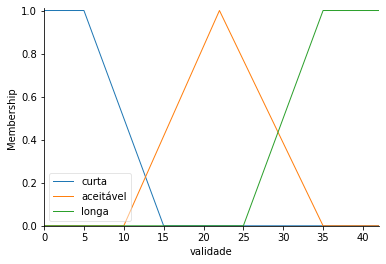

In [21]:
# [2] Fuzzificação
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando as variáveis do problema
temperatura = ctrl.Antecedent(np.arange(0, 31, 1), 'temperatura')
umidade = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade')
validade = ctrl.Consequent(np.arange(0, 43, 1), 'validade')

# Criando as funções de pertinência para a temperatura
temperatura['fria'] = fuzz.trapmf(temperatura.universe, [0, 0, 2, 8])
temperatura['amena'] = fuzz.gaussmf(temperatura.universe, 15, 5)
temperatura['quente'] = fuzz.trapmf(temperatura.universe, [20, 25, 30, 30])

# Criando as funções de pertinência para a umidade
umidade['baixa'] = fuzz.trapmf(umidade.universe, [0, 0, 20, 60])
umidade['média'] = fuzz.trapmf(umidade.universe, [0, 50, 60, 100])
umidade['alta'] = fuzz.trimf(umidade.universe, [60, 100, 100])

# Criando as funções de pertinência para validade em uso
validade['curta'] = fuzz.trapmf(validade.universe, [0, 0, 5, 15])
validade['aceitável'] = fuzz.trimf(validade.universe, [10, 22, 35])
validade['longa'] = fuzz.trapmf(validade.universe, [25, 35, 42, 42])


# Visualizando as funções de pertinência para cada variável
temperatura.view()
umidade.view()
validade.view()

Digite a T (ºC): 32
A temperatura deve estar no intervalo [0, 30]
Digite a T (ºC): 15
Digite a UR (%): 35
A validade é de 22 dias


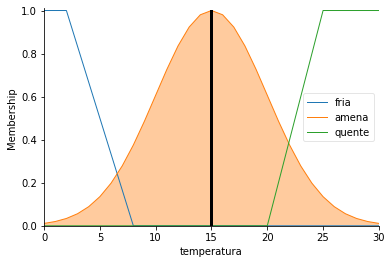

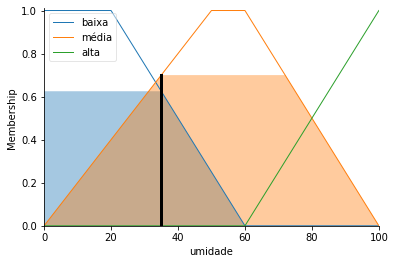

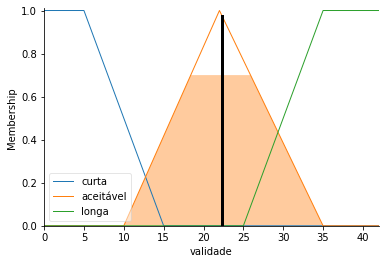

In [22]:
# [3] Inferência Fuzzy e Defuzzificação

# Base de Conhecimento/Regras
rule1 = ctrl.Rule(temperatura['fria'] & umidade['baixa'], validade['longa'])
rule2 = ctrl.Rule(temperatura['quente'] | umidade['alta'], validade['curta'])
rule3 = ctrl.Rule(umidade['média'], validade['aceitável'])

# Sistema Fuzzy e Simulação
validade_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
validade_simulador = ctrl.ControlSystemSimulation(validade_ctrl)

# Entranda da temperatura
while True:
  temp = float(input('Digite a T (ºC): '))
  if(temp<0 or temp >30):
    print('A temperatura deve estar no intervalo [0, 30]')
    continue
  validade_simulador.input['temperatura'] = temp
  break

# Entrada da umidade relativa  
while True:
  ur = float(input('Digite a UR (%): '))
  if(ur<0 or temp >100):
    print('A umidade deve estar no intervalo [0, 100]')
    continue
  validade_simulador.input['umidade'] = ur
  break

# Computando o resultado (Inferência Fuzzy + Defuzzificação)
validade_simulador.compute()
print('A validade é de %d dias' % round(validade_simulador.output['validade']))

# Visualizando as regiões
temperatura.view(sim=validade_simulador)
umidade.view(sim=validade_simulador)
validade.view(sim=validade_simulador)